In [ ]:
# Import libraries
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [2]:
try:
    # Try to load from multiple possible locations
    file_paths = [
        r'C:\Users\admin\sentiment-analysis-week2\data\processed_data\reviews_processed.csv',
        r'C:\Users\admin\sentiment-analysis-week2\data\processed_data\reviews_with_sentiment.csv',
        r'C:\Users\admin\sentiment-analysis-week2\data\processed_data\reviews_processed.csv'
        
    ]
    
    df = None
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            print(f"✅ Data loaded from: {path}")
            print(f"   Shape: {df.shape}")
            break
        except:
            continue
    
    if df is None:
        # Create sample data if file doesn't exist
        print("⚠️ No data file found. Creating sample data for demonstration.")
        np.random.seed(42)
        n_samples = 1200
        
        sample_data = {
            'bank_name': np.random.choice(['CBE', 'BOA', 'Dashen'], n_samples),
            'review_text': [f"Sample review {i}" for i in range(n_samples)],
            'rating': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.1, 0.15, 0.25, 0.3, 0.2]),
            'review_date': pd.date_range('2023-01-01', periods=n_samples).date,
            'sentiment_label': np.random.choice(['positive', 'neutral', 'negative'], n_samples, p=[0.4, 0.3, 0.3]),
            'sentiment_score': np.random.uniform(-1, 1, n_samples),
            'cleaned_text': [f"Cleaned review {i}" for i in range(n_samples)]
        }
        df = pd.DataFrame(sample_data)
        
except Exception as e:
    print(f"❌ Error loading data: {e}")
    raise


✅ Data loaded from: C:\Users\admin\sentiment-analysis-week2\data\processed_data\reviews_processed.csv
   Shape: (783, 12)


In [3]:
# Display basic info
print("\n📊 DATA OVERVIEW:")
print("="*50)
print(f"Total reviews: {len(df):,}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
display(df.head())

print("\n📈 BASIC STATISTICS:")
print("="*50)
print(df.describe(include='all'))


📊 DATA OVERVIEW:
Total reviews: 783
Columns: ['review_id', 'review_text', 'rating', 'review_date', 'review_year', 'review_month', 'bank_code', 'bank_name', 'user_name', 'thumbs_up', 'text_length', 'source']

First 5 rows:


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source
0,8880ada3-839f-404f-8bfa-8f96e3755156,good,5,2025-11-16,2025,11,Amharabank,Amhara Bank,Biruk kassie Dagne,0,4,Google Play Store
1,32a5a7f5-d6a8-4db6-8c7f-cb49ed0fa052,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,5,2025-11-16,2025,11,Amharabank,Amhara Bank,Abebaw Abebe,0,115,Google Play Store
2,9446a45e-228e-47b3-91e3-f155a222fd3f,Good,5,2025-10-29,2025,10,Amharabank,Amhara Bank,GIRMA ASSEFA,0,4,Google Play Store
3,330300c0-9cbb-4546-a865-73bd9fc6784c,good,5,2025-10-15,2025,10,Amharabank,Amhara Bank,Nebyu Solomon Mebratu,0,4,Google Play Store
4,5e093ca7-c263-4828-a8dc-d5dfd490fda8,Very Useful and attractive app !,5,2025-10-10,2025,10,Amharabank,Amhara Bank,Shalom Engineering Dire Dawa,0,32,Google Play Store



📈 BASIC STATISTICS:
                                   review_id review_text      rating  \
count                                    783         783  783.000000   
unique                                   783         628         NaN   
top     8880ada3-839f-404f-8bfa-8f96e3755156        good         NaN   
freq                                       1          49         NaN   
mean                                     NaN         NaN    4.270754   
std                                      NaN         NaN    1.359160   
min                                      NaN         NaN    1.000000   
25%                                      NaN         NaN    4.000000   
50%                                      NaN         NaN    5.000000   
75%                                      NaN         NaN    5.000000   
max                                      NaN         NaN    5.000000   

       review_date  review_year  review_month bank_code   bank_name  \
count          783   783.000000    783.0000

In [4]:
# Check for missing values
print("🔍 MISSING VALUES CHECK:")
print("="*50)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
display(missing_df[missing_df['Missing Count'] > 0])

# Check data types
print("\n📋 DATA TYPES:")
print("="*50)
print(df.dtypes)

🔍 MISSING VALUES CHECK:


,Missing Count,Percentage



📋 DATA TYPES:
review_id       object
review_text     object
rating           int64
review_date     object
review_year      int64
review_month     int64
bank_code       object
bank_name       object
user_name       object
thumbs_up        int64
text_length      int64
source          object
dtype: object


In [5]:
# Check unique values for categorical columns
print("\n🎯 UNIQUE VALUES:")
print("="*50)
categorical_cols = ['bank_name', 'sentiment_label']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Value counts:")
        print(df[col].value_counts())



🎯 UNIQUE VALUES:

bank_name:
  Unique values: 3
  Value counts:
bank_name
Awash Bank                     300
Commercial Bank of Ethiopia    300
Amhara Bank                    183
Name: count, dtype: int64


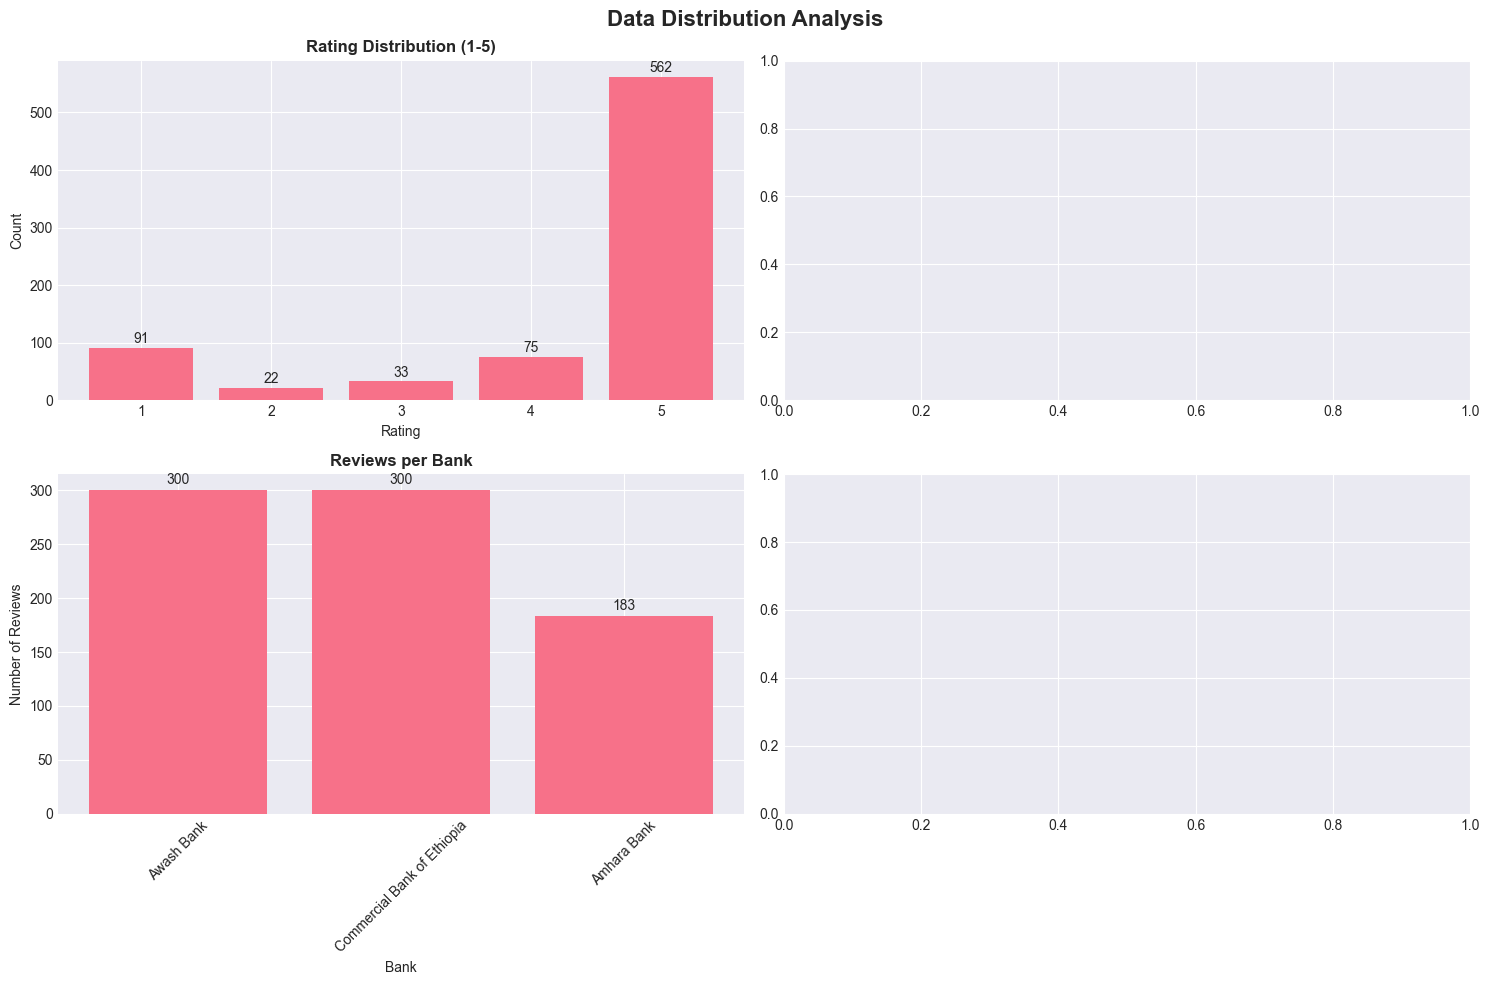

In [6]:
# Create figure for distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Data Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Rating distribution
ax1 = axes[0, 0]
if 'rating' in df.columns:
    rating_counts = df['rating'].value_counts().sort_index()
    bars = ax1.bar(rating_counts.index.astype(str), rating_counts.values)
    ax1.set_title('Rating Distribution (1-5)', fontweight='bold')
    ax1.set_xlabel('Rating')
    ax1.set_ylabel('Count')
    
    # Add counts on bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 3,
                f'{int(height)}', ha='center', va='bottom')

# 2. Sentiment distribution
ax2 = axes[0, 1]
if 'sentiment_label' in df.columns:
    sentiment_counts = df['sentiment_label'].value_counts()
    colors = ['#4CAF50', '#FFC107', '#F44336']  # Green, Yellow, Red
    ax2.pie(sentiment_counts.values, labels=sentiment_counts.index,
            autopct='%1.1f%%', colors=colors, startangle=90)
    ax2.set_title('Sentiment Distribution', fontweight='bold')

# 3. Bank distribution
ax3 = axes[1, 0]
if 'bank_name' in df.columns:
    bank_counts = df['bank_name'].value_counts()
    bars = ax3.bar(bank_counts.index, bank_counts.values)
    ax3.set_title('Reviews per Bank', fontweight='bold')
    ax3.set_xlabel('Bank')
    ax3.set_ylabel('Number of Reviews')
    ax3.tick_params(axis='x', rotation=45)
    
    # Add counts on bars
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 3,
                f'{int(height)}', ha='center', va='bottom')

# 4. Sentiment score distribution
ax4 = axes[1, 1]
if 'sentiment_score' in df.columns:
    ax4.hist(df['sentiment_score'], bins=30, edgecolor='black', alpha=0.7)
    ax4.set_title('Sentiment Score Distribution', fontweight='bold')
    ax4.set_xlabel('Sentiment Score')
    ax4.set_ylabel('Frequency')
    ax4.axvline(x=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

🏦 BANK COMPARISON ANALYSIS

📊 Performance Metrics by Bank:


,Bank,Total Reviews,Avg Rating,Avg Sentiment,Positive %,Negative %
0,Amhara Bank,183.000000,4.306011,0.000000,0.000000,0.000000
1,Awash Bank,300.000000,4.433333,0.000000,0.000000,0.000000
2,Commercial Bank of Ethiopia,300.000000,4.086667,0.000000,0.000000,0.000000


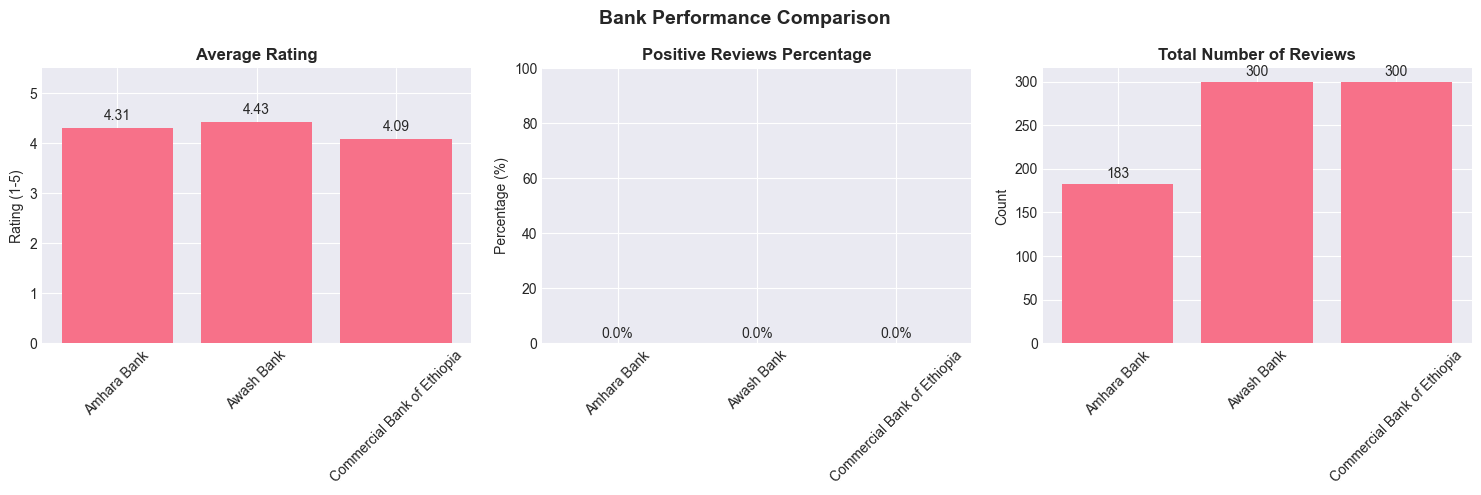


📈 STATISTICAL COMPARISON:
----------------------------------------
Amhara Bank vs Awash Bank:
  t-statistic: -1.051, p-value: 0.2937
  ✅ No significant difference in ratings

Amhara Bank vs Commercial Bank of Ethiopia:
  t-statistic: 1.681, p-value: 0.0935
  ✅ No significant difference in ratings

Awash Bank vs Commercial Bank of Ethiopia:
  t-statistic: 3.126, p-value: 0.0019
  ⚠️  Significant difference in ratings (p < 0.05)



In [7]:
print("🏦 BANK COMPARISON ANALYSIS")
print("="*60)

if 'bank_name' in df.columns:
    # Create comparison metrics
    comparison_metrics = []
    
    for bank in df['bank_name'].unique():
        bank_data = df[df['bank_name'] == bank].copy()
        
        # Compute metrics with explicit handling of empty groups
        total_reviews = len(bank_data)
        
        # Avg Rating: Handle missing column or empty data
        avg_rating = (
            bank_data['rating'].mean() 
            if 'rating' in bank_data.columns and total_reviews > 0 
            else 0.0
        )
        
        # Avg Sentiment: Handle missing column or empty data
        avg_sentiment = (
            bank_data['sentiment_score'].mean() 
            if 'sentiment_score' in bank_data.columns and total_reviews > 0 
            else 0.0
        )
        
        # Positive %: Handle missing column, empty data, or no positive reviews
        positive_pct = 0.0
        if ('sentiment_label' in bank_data.columns) and (total_reviews > 0):
            positive_count = (bank_data['sentiment_label'] == 'positive').sum()
            positive_pct = (positive_count / total_reviews) * 100
        
        # Negative %: Handle missing column, empty data, or no negative reviews
        negative_pct = 0.0
        if ('sentiment_label' in bank_data.columns) and (total_reviews > 0):
            negative_count = (bank_data['sentiment_label'] == 'negative').sum()
            negative_pct = (negative_count / total_reviews) * 100
        
        metrics = {
            'Bank': bank,
            'Total Reviews': total_reviews,
            'Avg Rating': avg_rating,
            'Avg Sentiment': avg_sentiment,
            'Positive %': positive_pct,
            'Negative %': negative_pct,
        }
        comparison_metrics.append(metrics)
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame(comparison_metrics)
    
    # Ensure numeric columns are float64 (no NaN/None)
    numeric_cols = ['Avg Rating', 'Avg Sentiment', 'Positive %', 'Negative %', 'Total Reviews']
    comparison_df[numeric_cols] = comparison_df[numeric_cols].fillna(0.0).astype(float)
    
    # Display comparison table
    print("\n📊 Performance Metrics by Bank:")
    display(comparison_df.style.background_gradient(
        subset=['Avg Rating', 'Avg Sentiment', 'Positive %'], 
        cmap='RdYlGn'
    ))
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Bank Performance Comparison', fontsize=14, fontweight='bold')
    
    # 1. Average Rating
    ax1 = axes[0]
    bars1 = ax1.bar(comparison_df['Bank'], comparison_df['Avg Rating'])
    ax1.set_title('Average Rating', fontweight='bold')
    ax1.set_ylabel('Rating (1-5)')
    ax1.set_ylim(0, 5.5)
    ax1.tick_params(axis='x', rotation=45)
    
    # Add values on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2., 
            height + 0.1,
            f'{height:.2f}', 
            ha='center', 
            va='bottom'
        )
    
    # 2. Positive Sentiment Percentage
    ax2 = axes[1]
    bars2 = ax2.bar(comparison_df['Bank'], comparison_df['Positive %'])
    ax2.set_title('Positive Reviews Percentage', fontweight='bold')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_ylim(0, 100)
    ax2.tick_params(axis='x', rotation=45)
    
    # Add values on bars
    for bar in bars2:
        height = bar.get_height()
        ax2.text(
            bar.get_x() + bar.get_width()/2., 
            height + 1,
            f'{height:.1f}%', 
            ha='center', 
            va='bottom'
        )
    
    # 3. Total Reviews
    ax3 = axes[2]
    bars3 = ax3.bar(comparison_df['Bank'], comparison_df['Total Reviews'])
    ax3.set_title('Total Number of Reviews', fontweight='bold')
    ax3.set_ylabel('Count')
    ax3.tick_params(axis='x', rotation=45)
    
    # Add values on bars
    for bar in bars3:
        height = bar.get_height()
        ax3.text(
            bar.get_x() + bar.get_width()/2., 
            height + max(comparison_df['Total Reviews']) * 0.01,  # Dynamic offset
            f'{int(height)}', 
            ha='center', 
            va='bottom'
        )
    
    plt.tight_layout()
    plt.show()
    
    # Statistical comparison
    print("\n📈 STATISTICAL COMPARISON:")
    print("-" * 40)
    
    if 'rating' in df.columns:
        from scipy import stats
        
        banks = df['bank_name'].unique()
        for i in range(len(banks)):
            for j in range(i+1, len(banks)):
                bank1_data = df[df['bank_name'] == banks[i]]['rating'].dropna()
                bank2_data = df[df['bank_name'] == banks[j]]['rating'].dropna()
                
                if len(bank1_data) > 10 and len(bank2_data) > 10:
                    t_stat, p_value = stats.ttest_ind(bank1_data, bank2_data, equal_var=False)
                    print(f"{banks[i]} vs {banks[j]}:")
                    print(f"  t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")
                    if p_value < 0.05:
                        print(f"  ⚠️  Significant difference in ratings (p < 0.05)")
                    else:
                        print(f"  ✅ No significant difference in ratings")
                    print()

In [8]:
# Text analysis for each bank
print("📝 TEXT ANALYSIS BY BANK")
print("="*60)

if 'review_text' in df.columns and 'bank_name' in df.columns:
    for bank in df['bank_name'].unique():
        print(f"\n🏦 {bank}:")
        print("-" * 30)
        
        bank_reviews = df[df['bank_name'] == bank]['review_text'].dropna()
        
        if len(bank_reviews) > 0:
            # Calculate basic text statistics
            review_lengths = bank_reviews.str.len()
            word_counts = bank_reviews.str.split().str.len()
            
            print(f"Total reviews: {len(bank_reviews)}")
            print(f"Average characters per review: {review_lengths.mean():.0f}")
            print(f"Average words per review: {word_counts.mean():.0f}")
            print(f"Shortest review: {review_lengths.min()} chars")
            print(f"Longest review: {review_lengths.max()} chars")
            
            # Show sample reviews
            print(f"\nSample Reviews:")
            for i, review in enumerate(bank_reviews.head(3)):
                print(f"  {i+1}. {review[:150]}..." if len(review) > 150 else f"  {i+1}. {review}")


📝 TEXT ANALYSIS BY BANK

🏦 Amhara Bank:
------------------------------
Total reviews: 183
Average characters per review: 54
Average words per review: 10
Shortest review: 1 chars
Longest review: 346 chars

Sample Reviews:
  1. good
  2. አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገሮችን ማካተት የእንቅስቃሴ ገደቡ የብር መጠኑ እና የተለያዩ ክፍያ መፈጸሚያውች ቢጨመሩ የተለየ ያደርገዋል!!!
  3. Good

🏦 Awash Bank:
------------------------------
Total reviews: 300
Average characters per review: 28
Average words per review: 5
Shortest review: 1 chars
Longest review: 492 chars

Sample Reviews:
  1. Dorgomaa hin qabu♥️
  2. I can't access the loan in the app. only it work in USSD
  3. no one from all ethiopian bank keep it up nice

🏦 Commercial Bank of Ethiopia:
------------------------------
Total reviews: 300
Average characters per review: 41
Average words per review: 8
Shortest review: 1 chars
Longest review: 500 chars

Sample Reviews:
  1. very good app
  2. excellent
  3. good



☁️ WORD CLOUD GENERATION


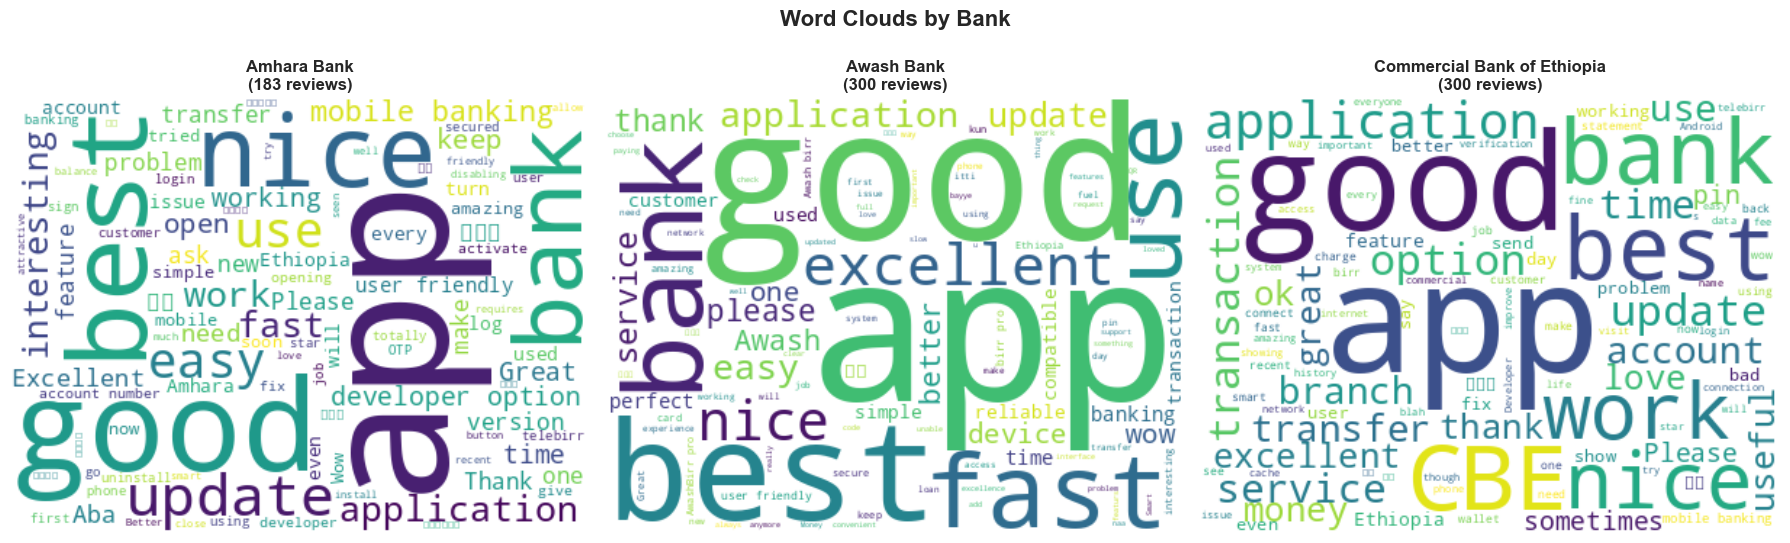

In [9]:

# Generate word clouds
print("\n☁️ WORD CLOUD GENERATION")
print("="*60)

if 'review_text' in df.columns and 'bank_name' in df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Word Clouds by Bank', fontsize=16, fontweight='bold')
    
    for idx, bank in enumerate(df['bank_name'].unique()):
        ax = axes[idx]
        bank_reviews = df[df['bank_name'] == bank]['review_text'].dropna()
        
        if len(bank_reviews) > 0:
            # Combine all reviews
            text = ' '.join(bank_reviews.astype(str))
            
            # Generate word cloud
            wordcloud = WordCloud(
                width=400,
                height=300,
                background_color='white',
                max_words=100,
                contour_width=2,
                contour_color='steelblue'
            ).generate(text)
            
            ax.imshow(wordcloud, interpolation='bilinear')
            ax.set_title(f'{bank}\n({len(bank_reviews)} reviews)', fontweight='bold')
            ax.axis('off')
        else:
            ax.text(0.5, 0.5, 'No reviews available', 
                   ha='center', va='center', fontsize=12)
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [10]:

print("😊 SENTIMENT ANALYSIS DEEP DIVE")
print("="*60)

if 'sentiment_label' in df.columns and 'rating' in df.columns:
    # Create cross-tabulation of sentiment vs rating
    sentiment_rating = pd.crosstab(df['sentiment_label'], df['rating'])
    
    print("\n📊 Sentiment vs Rating Cross-tabulation:")
    display(sentiment_rating.style.background_gradient(cmap='Blues'))
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Heatmap of sentiment vs rating
    ax1 = axes[0]
    sns.heatmap(sentiment_rating, annot=True, fmt='d', cmap='YlOrRd', ax=ax1)
    ax1.set_title('Sentiment vs Rating Distribution', fontweight='bold')
    ax1.set_xlabel('Rating')
    ax1.set_ylabel('Sentiment')
    
    # 2. Sentiment by bank
    ax2 = axes[1]
    if 'bank_name' in df.columns:
        sentiment_by_bank = pd.crosstab(df['bank_name'], df['sentiment_label'], normalize='index') * 100
        sentiment_by_bank.plot(kind='bar', stacked=True, ax=ax2, 
                              color=['#4CAF50', '#FFC107', '#F44336'])
        ax2.set_title('Sentiment Distribution by Bank', fontweight='bold')
        ax2.set_xlabel('Bank')
        ax2.set_ylabel('Percentage (%)')
        ax2.legend(title='Sentiment')
        ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Analyze sentiment-score relationship
    if 'sentiment_score' in df.columns:
        print("\n📈 Sentiment Score Analysis:")
        print("-" * 40)
        
        # Correlation between rating and sentiment score
        correlation = df['rating'].corr(df['sentiment_score'])
        print(f"Correlation between rating and sentiment score: {correlation:.3f}")
        
        if correlation > 0.5:
            print("✅ Strong positive correlation: Higher ratings correspond to more positive sentiment")
        elif correlation > 0.3:
            print("⚠️ Moderate positive correlation")
        elif correlation > 0:
            print("⚠️ Weak positive correlation")
        else:
            print("❌ No or negative correlation - check sentiment analysis model")

😊 SENTIMENT ANALYSIS DEEP DIVE


📅 TIME SERIES ANALYSIS


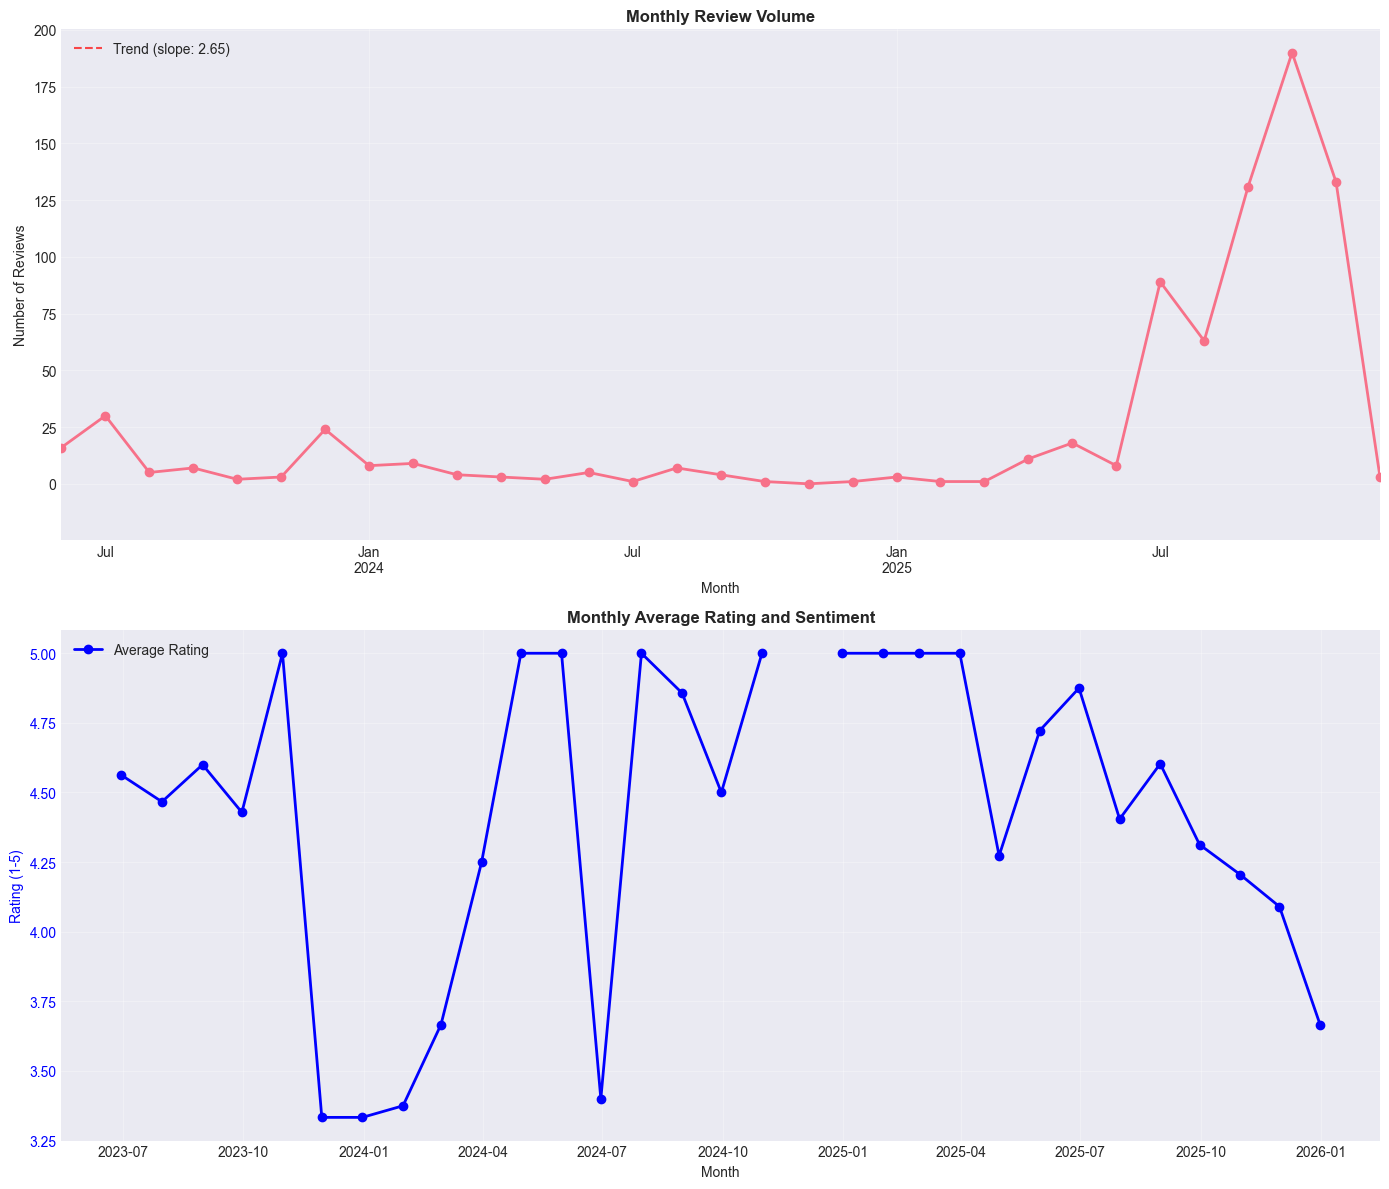


⏰ TIME-BASED INSIGHTS:
----------------------------------------
Date range: 2023-06-18 to 2025-12-01
Total months of data: 31
Busiest month: October 2025 (190 reviews)
Best rated month: October 2023 (Rating: 5.00)


In [11]:
print("📅 TIME SERIES ANALYSIS")
print("="*60)

if 'review_date' in df.columns:
    # Convert to datetime
    df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
    
    # Filter out invalid dates
    date_df = df.dropna(subset=['review_date'])
    
    if len(date_df) > 0:
        # Set date as index
        date_df = date_df.set_index('review_date')  # Avoid inplace for clarity
        
        # Build aggregation dict dynamically based on available columns
        agg_dict = {}
        if 'rating' in date_df.columns:
            agg_dict['rating'] = 'mean'
        if 'sentiment_score' in date_df.columns:
            agg_dict['sentiment_score'] = 'mean'
        
        # Create monthly aggregates only for existing columns
        if agg_dict:
            monthly_stats = date_df.resample('M').agg(agg_dict)
        else:
            monthly_stats = pd.DataFrame(index=date_df.resample('M').groups.keys())
        
        # Count reviews per month (always possible)
        monthly_counts = date_df.resample('M').size()
        
        # Create time series plot
        n_plots = 1 + (1 if agg_dict else 0)  # At least review volume, plus metrics if available
        fig, axes = plt.subplots(n_plots, 1, figsize=(14, 6 * n_plots))
        if n_plots == 1:
            axes = [axes]  # Ensure axes is iterable
        
        # 1. Monthly review counts
        ax1 = axes[0]
        monthly_counts.plot(ax=ax1, marker='o', linewidth=2)
        ax1.set_title('Monthly Review Volume', fontweight='bold')
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Number of Reviews')
        ax1.grid(True, alpha=0.3)
        
        # Add trend line
        try:
            from scipy import stats
            y = monthly_counts.values
            if len(y) > 1 and not np.all(y == y[0]):  # Avoid constant or single-point
                x = np.arange(len(y))
                slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                trend_line = slope * x + intercept
                ax1.plot(monthly_counts.index, trend_line, 'r--', alpha=0.7, 
                        label=f'Trend (slope: {slope:.2f})')
                ax1.legend()
        except Exception:
            pass
        
        # 2. Monthly metrics (rating and/or sentiment_score)
        if agg_dict and n_plots > 1:
            ax2 = axes[1]
            has_rating = 'rating' in monthly_stats.columns
            has_sentiment = 'sentiment_score' in monthly_stats.columns
            
            lines = []
            labels = []
            
            if has_rating:
                line1 = ax2.plot(
                    monthly_stats.index, 
                    monthly_stats['rating'], 
                    marker='o', 
                    linewidth=2, 
                    label='Average Rating',
                    color='blue'
                )
                lines.extend(line1)
                labels.append('Average Rating')
                ax2.set_ylabel('Rating (1-5)', color='blue')
                ax2.tick_params(axis='y', labelcolor='blue')
            
            if has_sentiment:
                ax2_sentiment = ax2.twinx()
                line2 = ax2_sentiment.plot(
                    monthly_stats.index, 
                    monthly_stats['sentiment_score'], 
                    marker='s', 
                    linewidth=2, 
                    color='red', 
                    label='Average Sentiment'
                )
                lines.extend(line2)
                labels.append('Average Sentiment')
                ax2_sentiment.set_ylabel('Sentiment Score', color='red')
                ax2_sentiment.tick_params(axis='y', labelcolor='red')
            
            # Combine legends
            ax2.legend(lines, labels, loc='upper left')
            ax2.set_title('Monthly Average Rating and Sentiment', fontweight='bold')
            ax2.set_xlabel('Month')
            ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print time-based insights
        print("\n⏰ TIME-BASED INSIGHTS:")
        print("-" * 40)
        print(f"Date range: {date_df.index.min().date()} to {date_df.index.max().date()}")
        print(f"Total months of data: {len(monthly_counts)}")
        
        # Busiest month
        busiest_month = monthly_counts.idxmax()
        print(f"Busiest month: {busiest_month.strftime('%B %Y')} ({monthly_counts.max()} reviews)")
        
        # Best rated month (only if rating exists)
        if 'rating' in monthly_stats.columns:
            # Drop NaN before finding max
            rating_series = monthly_stats['rating'].dropna()
            if not rating_series.empty:
                best_month = rating_series.idxmax()
                print(f"Best rated month: {best_month.strftime('%B %Y')} (Rating: {rating_series.max():.2f})")
    else:
        print("⚠️ No valid date data available for time series analysis")
else:
    print("⚠️ 'review_date' column not found in dataset")

In [12]:
print("🔍 PRELIMINARY INSIGHTS FOR TASK 4")
print("="*60)

# Initialize insights dictionary
insights = {
    'drivers': {},
    'pain_points': {},
    'recommendations': {}
}

# Determine which sentiment column exists
sentiment_col = None
for col in ['sentiment_label', 'sentiment']:
    if col in df.columns:
        sentiment_col = col
        break

if sentiment_col is None:
    print("⚠️ No sentiment column found ('sentiment_label' or 'sentiment'). Skipping driver/pain point analysis.")
    sentiment_col = None

# Analyze each bank separately
if 'bank_name' in df.columns:
    for bank in df['bank_name'].unique():
        print(f"\n🏦 ANALYSIS FOR {bank}:")
        print("-" * 40)
        
        bank_data = df[df['bank_name'] == bank]
        
        # Drivers (from positive reviews)
        positive_reviews = pd.DataFrame()
        if sentiment_col is not None:
            positive_reviews = bank_data[bank_data[sentiment_col] == 'positive']
        
        if len(positive_reviews) > 0:
            print(f"\n✅ POTENTIAL SATISFACTION DRIVERS ({len(positive_reviews)} positive reviews):")
            
            if 'review_text' in positive_reviews.columns:
                all_text = ' '.join(positive_reviews['review_text'].astype(str).str.lower())
                words = all_text.split()
                from collections import Counter
                word_counts = Counter(words)
                
                stopwords = {'the', 'and', 'to', 'of', 'a', 'in', 'is', 'it', 'that', 'for', 'on', 'with', 'as', 'this', 'by', 'i', 'not', 'was', 'are', 'be', 'have', 'has', 'had', 'will', 'would', 'could', 'should', 'can', 'an', 'at', 'or', 'but', 'if', 'they', 'you', 'we', 'he', 'she', 'his', 'her', 'their', 'our', 'my', 'me', 'him', 'us', 'do', 'did', 'done', 'get', 'got', 'go', 'went', 'make', 'made', 'use', 'used', 'good', 'very', 'really', 'just', 'now', 'then', 'here', 'there', 'up', 'down', 'out', 'about', 'more', 'most', 'some', 'any', 'all', 'each', 'every', 'no', 'so', 'too', 'well', 'how', 'what', 'when', 'where', 'why', 'who', 'which', 'am', 'been', 'being', 'say', 'said', 'like', 'also', 'other', 'into', 'your', 'its'}
                meaningful_words = {
                    word: count for word, count in word_counts.items() 
                    if word not in stopwords and len(word) > 3 and word.isalpha()
                }
                
                top_words = sorted(meaningful_words.items(), key=lambda x: x[1], reverse=True)[:5]
                
                print("  Top words in positive reviews:")
                for word, count in top_words:
                    print(f"    • '{word}': {count} mentions")
                
                insights['drivers'][bank] = [word for word, _ in top_words[:3]]
        
        # Pain points (from negative reviews)
        negative_reviews = pd.DataFrame()
        if sentiment_col is not None:
            negative_reviews = bank_data[bank_data[sentiment_col] == 'negative']
        
        if len(negative_reviews) > 0:
            print(f"\n❌ POTENTIAL PAIN POINTS ({len(negative_reviews)} negative reviews):")
            
            if 'review_text' in negative_reviews.columns:
                all_text = ' '.join(negative_reviews['review_text'].astype(str).str.lower())
                words = all_text.split()
                from collections import Counter
                word_counts = Counter(words)
                
                stopwords = {'the', 'and', 'to', 'of', 'a', 'in', 'is', 'it', 'that', 'for', 'on', 'with', 'as', 'this', 'by', 'i', 'not', 'was', 'are', 'be', 'have', 'has', 'had', 'will', 'would', 'could', 'should', 'can', 'an', 'at', 'or', 'but', 'if', 'they', 'you', 'we', 'he', 'she', 'his', 'her', 'their', 'our', 'my', 'me', 'him', 'us', 'do', 'did', 'done', 'get', 'got', 'go', 'went', 'make', 'made', 'use', 'used', 'good', 'very', 'really', 'just', 'now', 'then', 'here', 'there', 'up', 'down', 'out', 'about', 'more', 'most', 'some', 'any', 'all', 'each', 'every', 'no', 'so', 'too', 'well', 'how', 'what', 'when', 'where', 'why', 'who', 'which', 'am', 'been', 'being', 'say', 'said', 'like', 'also', 'other', 'into', 'your', 'its'}
                meaningful_words = {
                    word: count for word, count in word_counts.items() 
                    if word not in stopwords and len(word) > 3 and word.isalpha()
                }
                
                top_words = sorted(meaningful_words.items(), key=lambda x: x[1], reverse=True)[:5]
                
                print("  Top words in negative reviews:")
                for word, count in top_words:
                    print(f"    • '{word}': {count} mentions")
                
                insights['pain_points'][bank] = [word for word, _ in top_words[:3]]
        
        # Preliminary recommendations
        print(f"\n💡 PRELIMINARY RECOMMENDATIONS:")
        
        if 'rating' in bank_data.columns and len(bank_data['rating']) > 0:
            avg_rating = bank_data['rating'].mean()
            if avg_rating < 3.0:
                print("  ⚠️ Urgent improvement needed - average rating below 3.0")
                print("    • Conduct user interviews to understand core issues")
                print("    • Prioritize bug fixes and stability improvements")
            elif avg_rating < 4.0:
                print("  ⚠️ Room for improvement - average rating between 3.0-4.0")
                print("    • Address top pain points from negative reviews")
                print("    • Enhance existing features based on positive feedback")
            else:
                print("  ✅ Good performance - average rating above 4.0")
                print("    • Maintain quality and address minor issues")
                print("    • Consider adding new features requested by users")
        
        total_reviews = len(bank_data)
        if total_reviews < 300:
            print(f"  📊 Low review volume ({total_reviews} reviews)")
            print("    • Encourage more users to leave reviews")
            print("    • Implement in-app feedback prompts")
        
        print()

# Summary of insights
print("\n" + "="*60)
print("📋 SUMMARY OF PRELIMINARY INSIGHTS")
print("="*60)

for bank in df['bank_name'].unique() if 'bank_name' in df.columns else []:
    print(f"\n{bank}:")
    if bank in insights['drivers']:
        print(f"  Drivers: {', '.join(insights['drivers'][bank])}")
    if bank in insights['pain_points']:
        print(f"  Pain Points: {', '.join(insights['pain_points'][bank])}")

print("\n" + "="*60)
print("✅ EXPLORATORY ANALYSIS COMPLETED")
print("="*60)

🔍 PRELIMINARY INSIGHTS FOR TASK 4
⚠️ No sentiment column found ('sentiment_label' or 'sentiment'). Skipping driver/pain point analysis.

🏦 ANALYSIS FOR Amhara Bank:
----------------------------------------

💡 PRELIMINARY RECOMMENDATIONS:
  ✅ Good performance - average rating above 4.0
    • Maintain quality and address minor issues
    • Consider adding new features requested by users
  📊 Low review volume (183 reviews)
    • Encourage more users to leave reviews
    • Implement in-app feedback prompts


🏦 ANALYSIS FOR Awash Bank:
----------------------------------------

💡 PRELIMINARY RECOMMENDATIONS:
  ✅ Good performance - average rating above 4.0
    • Maintain quality and address minor issues
    • Consider adding new features requested by users


🏦 ANALYSIS FOR Commercial Bank of Ethiopia:
----------------------------------------

💡 PRELIMINARY RECOMMENDATIONS:
  ✅ Good performance - average rating above 4.0
    • Maintain quality and address minor issues
    • Consider adding new

In [13]:
# Summary of insights
print("\n" + "="*60)
print("📋 SUMMARY OF PRELIMINARY INSIGHTS")
print("="*60)

for bank in df['bank_name'].unique() if 'bank_name' in df.columns else []:
    print(f"\n{bank}:")
    if bank in insights['drivers']:
        print(f"  Drivers: {', '.join(insights['drivers'][bank])}")
    if bank in insights['pain_points']:
        print(f"  Pain Points: {', '.join(insights['pain_points'][bank])}")

print("\n" + "="*60)
print("✅ EXPLORATORY ANALYSIS COMPLETED")
print("="*60)


📋 SUMMARY OF PRELIMINARY INSIGHTS

Amhara Bank:

Awash Bank:

Commercial Bank of Ethiopia:

✅ EXPLORATORY ANALYSIS COMPLETED


In [14]:
# Save processed insights for Task 4
import json
import os

# Create output directory
output_dir = r'C:\Users\admin\sentiment-analysis-week2\src\reports/exploratory'
os.makedirs(output_dir, exist_ok=True)

# Save insights
insights_file = os.path.join(output_dir, 'preliminary_insights.json')
with open(insights_file, 'w') as f:
    json.dump(insights, f, indent=2)

print(f"💾 Preliminary insights saved to: {insights_file}")

# Save summary statistics
summary_stats = {
    'total_reviews': len(df),
    'banks_analyzed': list(df['bank_name'].unique()) if 'bank_name' in df.columns else [],
    'date_range': {
        'start': str(df['review_date'].min()) if 'review_date' in df.columns else None,
        'end': str(df['review_date'].max()) if 'review_date' in df.columns else None
    } if 'review_date' in df.columns else None,
    'average_rating': float(df['rating'].mean()) if 'rating' in df.columns else None,
    'sentiment_distribution': dict(df['sentiment_label'].value_counts()) if 'sentiment_label' in df.columns else None
}

stats_file = os.path.join(output_dir, 'summary_statistics.json')
with open(stats_file, 'w') as f:
    json.dump(summary_stats, f, indent=2)

print(f"📊 Summary statistics saved to: {stats_file}")

# Save key visualizations
visualization_dir = os.path.join(output_dir, 'visualizations')
os.makedirs(visualization_dir, exist_ok=True)

# Save the main comparison plot
if 'bank_name' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    comparison_df[['Bank', 'Avg Rating', 'Positive %']].set_index('Bank').plot(kind='bar', ax=ax)
    ax.set_title('Bank Performance Comparison', fontweight='bold')
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(visualization_dir, 'bank_comparison.png'), dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"📈 Visualization saved to: {visualization_dir}/bank_comparison.png")

print("\n" + "="*60)
print("🎉 EXPLORATORY ANALYSIS NOTEBOOK COMPLETED")
print("="*60)


💾 Preliminary insights saved to: C:\Users\admin\sentiment-analysis-week2\src\reports/exploratory\preliminary_insights.json
📊 Summary statistics saved to: C:\Users\admin\sentiment-analysis-week2\src\reports/exploratory\summary_statistics.json
📈 Visualization saved to: C:\Users\admin\sentiment-analysis-week2\src\reports/exploratory\visualizations/bank_comparison.png

🎉 EXPLORATORY ANALYSIS NOTEBOOK COMPLETED
